# PCA

The goal of this tutorial is to learn to run PCA with scikit learn and to get an understanding on 1) how to run PCA, 2) what a PCA does. 

## Toy example: the very famouse IRIS dataset

In [2]:
print(__doc__)


# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

Automatically created module for IPython interactive environment


Question 1) How can you visualize the Iris dataset (X) ? Do you see obvious relationship between X and y ? Then, try to plot a 2D scatter plot (from X) that shows good separation of the classes (y). 

Question 2) Use PCA from sklearn to get the 2 principal components of X as well as the representation of each observation in these 2 composants. 

Question 3) Draw a plot with the two composantes (and change color of dot for each classes of y). Can you see a better separation of the classes compare to what you managed to do in question 1? 

Question 4) Considering the properties of the PCA, can you think of examples where PCA would not be efficient to reduce dimension? Can you generate such dataset and illustrate the limits of the PCA?

## Mnist (image compression with PCA)

Le dataset mnist est un ensemble d'images de chiffres (de 0 à 9) qui est utilisé pour les challenges de reconnaissance de chiffres écrits à la main. 
L'objectif de ce deuxième exercice est de tester la création de feature à partir de la PCA pour "compresser" les images. 

Vous allez donc : importer le jeux de données, appliquer la PCA dessus, observer la relation entre le nombre de composantes et le niveau d'information des images conservée.

Question 1) A partir de sklearn, loadez le dataset mnist. 

Question 2) Appliquez l'algorithme de PCA de sklearn sur les données Mnist. 

Question 3) Créer une fonction qui affiche des images de chiffres (de la base de données MNIST) ainsi que l'approximation faites à partir des n premières composantes de la PCA.

Question 4) A partir des méthodes de la classe PCA sur sklearn, tracez la variance des images expliquée en fonction du nombre de composantes choisies.

In [3]:
%matplotlib inline
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [14]:
mnist = fetch_openml('mnist_784', version=1)
mnist_copy = mnist

In [15]:
mnist.data[1]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,  51., 159., 253., 159.,  50.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [11]:
scaler = StandardScaler()

# Fit on training set only.
mnist_copy.data = scaler.fit_transform(mnist_copy.data)
pca = PCA(.95)
lower_dimensional_data = pca.fit_transform(mnist_copy.data)
pca.n_components_
approximation = pca.inverse_transform(lower_dimensional_data)

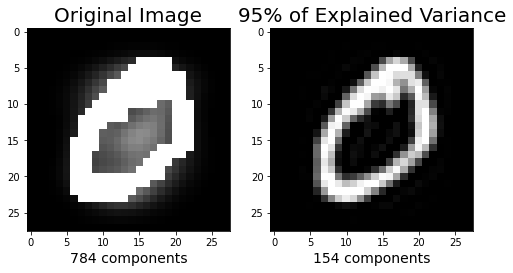

In [17]:
plt.figure(figsize=(8,4));

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(scaler.inverse_transform(mnist.data[1]).reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 components', fontsize = 14)
plt.title('Original Image', fontsize = 20);

# 154 principal components
plt.subplot(1, 2, 2);
plt.imshow(scaler.inverse_transform(approximation[1]).reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 components', fontsize = 14)
plt.title('95% of Explained Variance', fontsize = 20);



## Understanding the representation trade-off

In [19]:
# Summing explained variance
tot = sum(pca.explained_variance_)
tot

683.0821765005295

In [22]:
var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 
print(var_exp[0:5])
# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

[5.939509169132558, 4.253782362763662, 3.9348954134113288, 3.045162866461485, 2.6533358189413327]


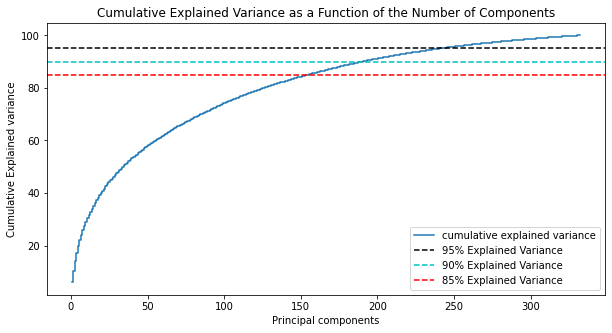

In [25]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(10, 5))
plt.step(range(1, 1+pca.n_components_), cum_var_exp, where='mid',label='cumulative explained variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
plt.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
plt.legend(loc='best')
plt.show()

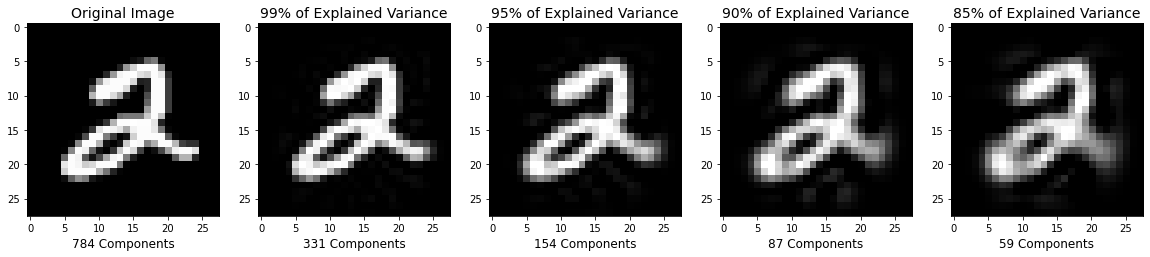

In [27]:
# This is an extremely inefficient function. Will get to why in a later tutorial
def explainedVariance(percentage, images): 
    # percentage should be a decimal from 0 to 1 
    pca = PCA(percentage)
    pca.fit(images)
    components = pca.transform(images)
    approxOriginal = pca.inverse_transform(components)
    return approxOriginal
plt.figure(figsize=(20,4));

# Original Image (784 components)
plt.subplot(1, 5, 1);
plt.imshow(mnist.data[5].reshape(28,28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('784 Components', fontsize = 12)
plt.title('Original Image', fontsize = 14);

# 331 principal components
plt.subplot(1, 5, 2);
plt.imshow(explainedVariance(.99, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('331 Components', fontsize = 12)
plt.title('99% of Explained Variance', fontsize = 14);

# 154 principal components
plt.subplot(1, 5, 3);
plt.imshow(explainedVariance(.95, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('154 Components', fontsize = 12)
plt.title('95% of Explained Variance', fontsize = 14);

# 87 principal components
plt.subplot(1, 5, 4);
plt.imshow(explainedVariance(.90, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('87 Components', fontsize = 12)
plt.title('90% of Explained Variance', fontsize = 14);

# 59 principal components
plt.subplot(1, 5, 5);
plt.imshow(explainedVariance(.85, mnist.data)[5].reshape(28, 28),
              cmap = plt.cm.gray, interpolation='nearest',
              clim=(0, 255));
plt.xlabel('59 Components', fontsize = 12)
plt.title('85% of Explained Variance', fontsize = 14);